## Algorithm Complexity: Array and Bubble Sort

An **algorithm** is a list of instructions for doing something, and algorithm design is essential to computer science. Here we will study simple algorithms of sorting an array of numbers. 

An **array** is a sequence of variables $x_1, x_2, x_3, ..., x_n$; e.g., 

![](./Figures/an_array_example.png)

Notice that the order of the elements in an array matters, and an array can have duplicate entries.

A **sort** is an algorithm that guarantees that
	       $$ x_1\leq  x_2\leq  x_3\leq \cdots \leq x_n $$
 after the algorithm finishes.

### Bubble sort

Let $x_1, x_2, ..., x_n$ be an array whose elements can be compared by $\leq $. The following algorithm is called a **bubble sort**.

![](./Figures/bubble-sort-algorithm.png)

The **bubble sort** makes multiple passes through an array. It compares adjacent items and exchanges those that are out of order. Each pass through the array places the next largest value in its proper place. In essence, each item “bubbles” up to the location where it belongs.

Following figure  shows the first pass of a bubble sort. The shaded items are being compared to see if they are out of order. If there are $n$ items in the array, then there are $n−1$ pairs of items that need to be compared on the first pass. It is important to note that once the largest value in the array is part of a pair, it will continually be moved along until the pass is complete.

![](./Figures/bubblepass.png)

At the start of the second pass, the largest value is now in place. There are $n−1$ items left to sort, meaning that there will be $n−2$ pairs. Since each pass places the next largest value in place, the total number of passes necessary will be $n−1$. After completing the $n−1$, the smallest item must be in the correct position with no further processing required. 

The exchange operation, sometimes called a “swap” as in the algorithm, is slightly different in Python than in most other programming languages. Typically, swapping two elements in an array requires a temporary storage location (an additional memory location). A code fragment such as

![](./Figures/swap.png)

will exchange the $i$th and $j$th items in the array. Without the temporary storage, one of the values would be overwritten.

In Python, it is possible to perform simultaneous assignment. The statement `a,b=b,a` will result in two assignment statements being done at the same time. Using simultaneous assignment, the exchange operation can be done in one statement.

![](./Figures/swap-python.png)

The following example shows the complete bubbleSort function working on the array shown above.

In [1]:
def bubbleSort(alist):
    for i in range(0, len(alist)-1):
        for j in range(0, len(alist)-1-i):
            if alist[j] > alist[j+1]:
                alist[j], alist[j+1] = alist[j+1], alist[j] 

alist = [54,26,93,17,77,31,44,55,20]
bubbleSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


To analyze the bubble sort, we should note that regardless of how the items are arranged in the initial array, $n−1$ passes will be made to sort an array of size n. Table below shows the number of comparisons for each pass. The total number of comparisons is the sum of the first $n−1$ integers. Recall that the sum of the first $n-1$ integers is $\frac{n(n-1)}{2}$  This is still $\mathcal{O}(n^2)$ comparisons. In the best case, if the list is already ordered, no exchanges will be made. However, in the worst case, every comparison will cause an exchange. On average, we exchange half of the time.

![](./Figures/bubblepass-table.png)

**Remark** A bubble sort is often considered the most inefficient sorting method since it must exchange items before the final location is known. These “wasted” exchange operations are very costly. However, because the bubble sort makes passes through the entire unsorted portion of the list, it has the capability to do something most sorting algorithms cannot. In particular, if during a pass there are no exchanges, then we know that the list must have been sorted already. A bubble sort can be modified to stop early if it finds that the list has become sorted. This means that for lists that require just a few passes, a bubble sort may have an advantage in that it will recognize the sorted list and stop. The following shows this modification, which is often referred to as the *short bubble*.

In [2]:
def shortBubbleSort(alist):
    exchanges = True
    passnum = len(alist)-1
    while passnum > 0 and exchanges:
       exchanges = False
       for i in range(passnum):
#           print(i)
           if alist[i]>alist[i+1]:
               exchanges = True
               alist[i], alist[i+1] = alist[i+1], alist[i]
       passnum = passnum-1
#       print('passnum = ', passnum)
        
alist = [54,26,93,17,77,31,44,55,20]
#alist = [17, 20, 26, 31, 44, 54, 55, 77, 93]
shortBubbleSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


### Plotting Algorithmic Time Complexity of a Function using Python

We may take an idea of using the Python `Timer` and `timeit` methods to create a simple plotting scheme using `matplotlib`.

Here is the code. The code is quite simple. Perhaps the only interesting thing here is the use of `partial` to pass in the function and the $N$ parameter into `Timer`. You can add in your own function here and plot the time complexity.

In [3]:
from matplotlib import pyplot
import numpy as np
import timeit
from functools import partial
import random

In [4]:
def fconst(N):
    """
    O(1) function
    """
    x = 1

def flinear(N):
    """
    O(n) function
    """
    x = [i for i in range(N)]

def fsquare(N):
    """
    O(n^2) function
    """
    for i in range(N):
        for j in range(N):
            x = i*j

def fshuffle(N):
    # O(N)
    random.shuffle(list(range(N)))

def fsort(N):
    x = list(range(N))
    random.shuffle(x)
    x.sort()
    

def plotTC(fn, nMin, nMax, nInc, nTests):
    """
    Run timer and plot time complexity
    """
    x = []
    y = []
    for i in range(nMin, nMax, nInc):
        N = i
        testNTimer = timeit.Timer(partial(fn, N))
        t = testNTimer.timeit(number=nTests)
        x.append(i)
        y.append(t)
    p1 = pyplot.plot(x, y, 'o')
    #pyplot.legend([p1,], [fn.__name__, ])

Analyzing Algorithms...


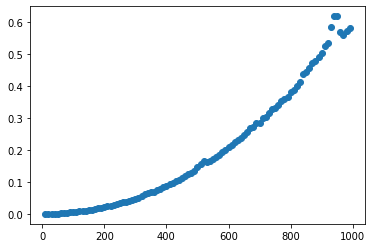

In [9]:
# main() function
def main():
    print('Analyzing Algorithms...')

    #plotTC(fconst, 10, 1000, 10, 10)
    #plotTC(flinear, 10, 1000, 10, 10)
    plotTC(fsquare, 10, 1000, 10, 10)
    #plotTC(fshuffle, 10, 1000, 1000, 10)
    #plotTC(fsort, 10, 1000, 10, 10)
    # enable this in case you want to set y axis limits
    #pyplot.ylim((-0.1, 0.5))
    
    # show plot
    pyplot.show()

# call main
if __name__ == '__main__':
    main()

### Exercises

#1. [10 ps] Let $x_1, x_2, ..., x_n$ be an array whose elements can be compared by the total ordering $\leq$. 

    (a) Write an algorithm for computing the maximum element in the array. 
    (b) How many "<" comparisons does your algorithm require?
    (c) Write a python code based on your algorithm and test your assertion in (b) with   
    examples of several arrays.
  
#2. [5 pts] Write a python code plotting algorithmic time complexity of the `bubbleSort` function. 

#3. [15 pts] The following is a pseudo code of **Insertion sort**, which is a simple sorting algorithm 
that builds the final sorted array one item at a time. Write a `insertionSort` in python and 
plot algorithmic time complexity of the `insertionSort` function.

  ![](./Figures/insertion_sort.png)
  

#4. [10 pts] There are dataset in 2001 and 2002 in the United Arab Emirates that show the types of accidents and types of traffic accidents on Emirates ([http://www.bayanat.ae](http://www.bayanat.ae)). Use the bubble sort method (in Python) to rearrange the dataset as follows:

    ST1. Sort alphabetically according to Emirates.
    ST2. For the same Emirates, classify by accident type.
    ST3. For incidents of the same type, sort by year in ascending order.
    ST4. In the same year, sort the number of accidents in order.

Write the python code. What can you tell about traffic accidents in Ras Al Khaimah?

#5-1. [10 pts] There are dataset in 2003-2017 that show the mean temperature
in the Emirates ([http://data.bayanat.ae/en_GB/dataset/mean-temperature-by-year-and-month ])  
Use the bubble sort (or short bubble short) method to rearrange the dataset as follows:

    ST1. Sort it by Year in ascending order (from 2003 to 2017). 
    ST2. For the same Year, sort it by Month in ascending order (from January to December).
    ST3. Use the sorted result data to plot "Month vs Mean Temp"  graph for each year on the same window.

Write the python code. What can you tell about the tendency of mean temperature in UAE? How do Mean Temperatures change over years?

#5-2. [10 pts] There are dataset in 2003-2017 that show the Mean of Relative Humidity by Month & Year ( %)bin the Emirates ([http://data.bayanat.ae/en_GB/dataset/mean-of-relative-humidity-by-year-and-month])  
Use the bubble sort (or short bubble short) method to rearrange the dataset as follows:

    ST1. Sort it by Year in ascending order (from 2003 to 2017). 
    ST2. For the same Year, sort it by Month in ascending order (from January to December).
    ST3. Use the sorted result data to plot "Month vs Mean Temp"  graph for each year on the same window.

Write the python code. What can you tell about the tendency of relative humidity in UAE? How do Relative Humidity change over years?

#5-3. [10 pts] Compare the results of Problem 4-2 and 4-3 and discuss your observation. (If appropriate, you may write a python code (for analyzing or visualizing) to support your argument.)